In [ ]:
from google.colab import drive
drive.mount('/content/drive')

sử dụng tensorflow 2.x 

In [ ]:
%tensorflow_version 2.x 

import 1 vài thư viện cần thiết cần thiết 

In [ ]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import seaborn as sn 
import numpy as np
import pandas as pd 
import math 
import datetime 
import platform 

print('Python version : ', platform.python_version()) 
print('Tensorflow version : ', tf.__version__) 
print('Keras version : ', tf.keras.__version__) 


load dataset từ mnist 

In [ ]:
dataset = tf.keras.datasets.mnist 
(x_train, y_train), (x_test, y_test) = dataset.load_data()


In [ ]:
print('x_train : ', x_train.shape)
print('y_train : ', y_train.shape)
print('x_test : ', x_test.shape)
print('y_test : ', y_test.shape)

tạo 1 grid để show dataset

In [ ]:
number_to_display = 25
num_cells = math.ceil(math.sqrt(number_to_display)) 
plt.figure(figsize = (10, 10)) 
for i in range(number_to_display) : 
  plt.subplot(num_cells, num_cells, i+1) 
  plt.xticks([]) 
  plt.yticks([]) 
  plt.grid(True) 
  plt.imshow(x_train[i], cmap=plt.cm.binary) 
  plt.xlabel(y_train[i]) 
plt.show()

reshape lại kiểu dữ liệu từ (28,28) -> (28,28,1) 

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) 
x_test  = x_test.reshape(x_test.shape[0], 28, 28, 1) 

normalization chuyển từ 0->255 sang 0->1

In [ ]:
x_train = x_train/255
x_test  = x_test/255 

Khai báo các super parameter


In [ ]:
IMAGE_WIDTH = 28 
IMAGE_HEIGHT = 28
IMAGE_CHANNELS = 1
epochs = 10

Xây dựng 1 model CNN đơn giản 

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

thê hiện ra cấu trúc của model 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               3

xác định optimizer và compile cho model 

In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) 

model.compile(optimizer = adam_optimizer, 
              loss = tf.keras.losses.sparse_categorical_crossentropy, 
              metrics = ['accuracy']               
)

Train model 

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train,
    y_train,
    epochs=epochs,
    validation_data=(x_test, y_test),
    callbacks=[tensorboard_callback]
)

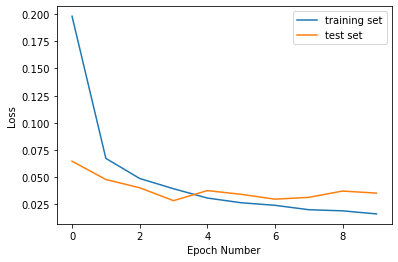

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

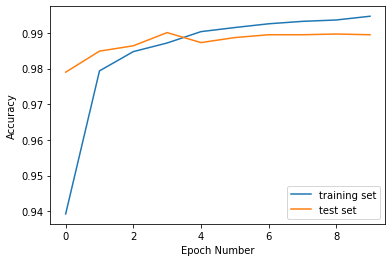

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

evaluate để lấy ra loss và accuracy của 2 bộ train và test 
-> so sánh để kiểm tra overfiting 

In [ ]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)

In [ ]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

In [ ]:
validation_loss, validation_accuracy = model.evaluate(x_test, y_test)

In [ ]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Save model 

In [ ]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

In [ ]:
loaded_model = tf.keras.models.load_model(model_name)

Dùng model để predict x_test theo dạng onehot 

In [ ]:
predictions_one_hot = loaded_model.predict([x_test])

In [ ]:
print('predictions_one_hot:', predictions_one_hot.shape)

In [ ]:
pd.DataFrame(predictions_one_hot)

lấy ra giá trị của predictions 

In [ ]:
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

Show thể hiện ra 196 test đầu 

In [ ]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()